# Krylov Methods
## Gradient Descent

Iterate:

$\mathbf{r} \leftarrow \mathbf{f} - A\mathbf{u}$

$\alpha \leftarrow \langle \mathbf{r}, \mathbf{r} \rangle / \langle \mathbf{r}, A\mathbf{r} \rangle$

$\mathbf{u} \leftarrow \mathbf{u} + \alpha\mathbf{r}$


In [12]:
# # Import some python libraries we need
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def gradientDescent(A,u,f,numIts):
    for it in range(numIts):
        r = f - A.dot(u)
        alpha = np.dot(r,r) / np.dot(r,A.dot(r))
        u = u + alpha*r
    return u

In [35]:
# Define the size of the problem and construct the matrix
epsilon = 0.5
theta = 0.75
R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
D = np.array([[epsilon,0],[0,1]])
A = R.transpose().dot(D.dot(R))
f = np.zeros(2)
u = np.random.rand(100,2)
k = 0

# Show the condition number of A
print(np.linalg.cond(A))


2.0000000000000004


(-0.9603776211328977, 0.9603776211328977)

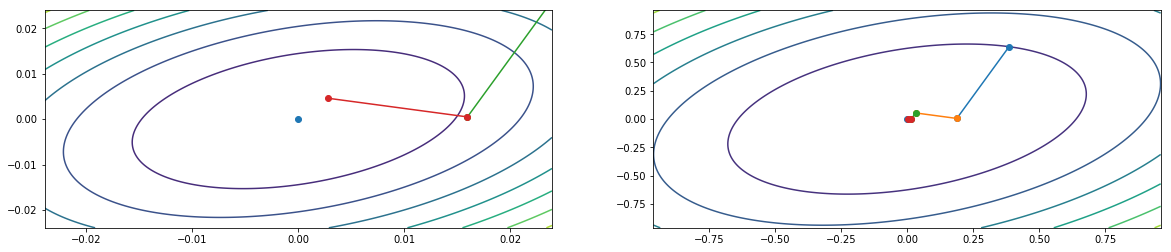

In [39]:
# Do an iteration of gradient descent
u[k+1,:] = gradientDescent(A,u[k,:],f,1)
k = k + 1

# Plot the level curves of phi, zooming in as we go
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
m = 200
d = max(u[k-1,0],u[k-1,1])
x, y = np.meshgrid(np.linspace(-1.5*d, 1.5*d, m), np.linspace(-1.5*d, 1.5*d, m))
X = np.array([x,y])
phi = np.zeros(np.shape(x))
for i in range(m*m):
    t = [x[i%m,int(i/m)],y[i%m,int(i/m)]]
    phi[i%m,int(i/m)] = 0.5*np.dot(t,A.dot(t)) - np.dot(t,f)

plt.contour(x,y,phi)
plt.scatter(0,0)

# Plot the iterates
for j in range(k):
    plt.plot([u[j+1,0],u[j,0]],[u[j+1,1],u[j,1]],'-o')
plt.xlim((-1.5*d,1.5*d))
plt.ylim((-1.5*d,1.5*d))

# Same plot as above but with fixed scale
plt.subplot(1,2,2)
d = max(u[0,0],u[0,1])
x, y = np.meshgrid(np.linspace(-1.5*d, 1.5*d, m), np.linspace(-1.5*d, 1.5*d, m))
X = np.array([x,y])
phi = np.zeros(np.shape(x))
for i in range(m*m):
    t = [x[i%m,int(i/m)],y[i%m,int(i/m)]]
    phi[i%m,int(i/m)] = 0.5*np.dot(t,A.dot(t)) - np.dot(t,f)

plt.contour(x,y,phi)
plt.scatter(0,0)
for j in range(k):
    plt.plot([u[j+1,0],u[j,0]],[u[j+1,1],u[j,1]],'-o')
plt.xlim((-1.5*d,1.5*d))
plt.ylim((-1.5*d,1.5*d))

# Conjugate Gradient (CG)
Set $\mathbf{u}$ initial guess

$\mathbf{r}_0 = \mathbf{f} - A\mathbf{u}$

For $k = 0,1,...$

If $k = 0$, then $\mathbf{p} = \mathbf{r}_k$

Else, $\beta  = \langle \mathbf{r}_k, \mathbf{r}_k \rangle / \langle \mathbf{r}_{k-1}, \mathbf{r}_{k-1} \rangle$, and $\mathbf{p}_k = \mathbf{r}_k + \beta \mathbf{p}_{k-1}$

$\alpha \leftarrow \langle \mathbf{r}_k, \mathbf{r}_k \rangle / \langle \mathbf{p}_k, A\mathbf{p}_k \rangle$

$\mathbf{u} \leftarrow \mathbf{u} + \alpha\mathbf{p}_k$

$\mathbf{r}_{k+1} \leftarrow \mathbf{r}_k - \alpha A\mathbf{p}_k$


In [26]:
def CG(A,u,f,numIts):
    r = f - np.dot(A,u)
    for it in range(numIts):
        if it == 0:
            p = r
        else:
            beta = np.dot(r,r)/np.dot(r_prev,r_prev)
            p = r + beta*p_prev
        Ap = np.dot(A,p) # This is the only mat-vec!
        alpha = np.dot(r,r)/np.dot(p,Ap)
        u = u + alpha*p
        r_prev = r
        p_prev = p
        r = r - alpha*Ap
    return u
        

In [67]:
def phi(A,u,f):
    return 0.5*np.dot(u,np.dot(A,u)) - np.dot(u,f)

In [85]:
# Define the size of the problem and construct the matrix
epsilon = 0.5
theta = 0.75
R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
D = np.array([[epsilon,0],[0,1]])
A = R.transpose().dot(D.dot(R))
f = np.zeros(2)
u = np.random.rand(2)
k = 0

# Show the condition number of A
print(np.linalg.cond(A))

2.0000000000000004


In [86]:
# Do 2 CG iterations and show that u is zero!
u_init = np.random.rand(2)
u = CG(A,u_init,f,2)
print(np.linalg.norm(u))
print(phi(A,u,f))

# Compare to gradient descent
u = gradientDescent(A,u_init,f,2)
print(np.linalg.norm(u))
print(phi(A,u,f))

6.206335383118183e-17
1.0397911312439502e-33
0.07615520310126792
0.00188630560190454


# Preconditioned Conjugate Gradient (PCG)
Set $\mathbf{u}$ initial guess

$\mathbf{r}_0 = \mathbf{f} - A\mathbf{u}$

For $k = 0,1,...$

$\mathbf{z}_k = M^{-1}\mathbf{r}_k$

If $k = 0$, then $\mathbf{p} = \mathbf{z}_k$

Else, $\beta  = \langle \mathbf{r}_k, \mathbf{z}_k \rangle / \langle \mathbf{r}_{k-1}, \mathbf{z}_{k-1} \rangle$, and $\mathbf{p}_k = \mathbf{z}_k + \beta \mathbf{p}_{k-1}$

$\alpha \leftarrow \langle \mathbf{r}_k, \mathbf{z}_k \rangle / \langle \mathbf{p}_k, A\mathbf{p}_k \rangle$

$\mathbf{u} \leftarrow \mathbf{u} + \alpha\mathbf{p}_k$

$\mathbf{r}_{k+1} \leftarrow \mathbf{r}_k - \alpha A\mathbf{p}_k$


In [88]:
def PCG(A,Minv,u,f,numIts):
    r = f - np.dot(A,u)
    for it in range(numIts):
        z = Minv(A,r)
        if it == 0:
            p = z
        else:
            beta = np.dot(r,z)/np.dot(r_prev,z_prev)
            p = z + beta*p_prev
        Ap = np.dot(A,p) # This is the only mat-vec!
        alpha = np.dot(r,z)/np.dot(p,Ap)
        u = u + alpha*p
        r_prev = r
        z_prev = z
        p_prev = p
        r = r - alpha*Ap
    return u
        

In [89]:
def Minv(A,r):
    d0 = np.diag(A)
    d1 = np.diag(A,k=1)
    d2 = np.diag(A,k=-1)
    T = np.diag(d0) + np.diag(d1,k=1) + np.diag(d2,k=-1)
#     L = np.tril(A) # Lower triangular part of A
    return np.linalg.solve(T, r)

In [81]:
# Get some code for generating test problems from PyAMG
# PyAMG: https://github.com/pyamg/pyamg
!wget -Nq https://raw.githubusercontent.com/pyamg/pyamg/master/pyamg/gallery/diffusion.py
!wget -Nq https://raw.githubusercontent.com/pyamg/pyamg/master/pyamg/gallery/stencil.py
import diffusion
import stencil

In [82]:
# 2D Model problem
def ModelProblem2D(n):
    sten = diffusion.diffusion_stencil_2d(epsilon=1.0, theta=0.0, type='FD')
    A = stencil.stencil_grid(sten, (n-1,n-1), format='csr')
    return A.toarray()*n*n

In [95]:
# Get 2D model problem
n = 16
N = (n-1)*(n-1)
A = ModelProblem2D(n)

# Define a solution and corresponding right-hand side
# u_final = np.random.rand(N)
# f = A*u_final

# Define a right-hand side and corresponding solution
# f = np.ones(N)
# u_final = sla.spsolve(A,f)

# Define a zero right-hand side and random initial guess
f = np.zeros(N)
u_final = np.zeros(N)
u = np.random.rand(N)

# Set the initial guess and make a copy
# u = np.zeros((N,))
u_next = u.copy()
i = 0

In [98]:
# Compare CG and PCG
u_init = u
u = CG(A,u_init,f,10)
print(np.linalg.norm(u))
print(phi(A,u,f))

u = PCG(A,Minv,u_init,f,10)
print(np.linalg.norm(u))
print(phi(A,u,f))

6.258656498437702e-17
9.025074460341998e-32
2.069695372806702e-17
1.1652273360899497e-32
